# Reservoir rock type classification

Objective: Perform reservoir rock type classification through machine learning algorithms and compare with regular petrophysics approach.

About the data: The dataset contains the lab measurements of porosity and permeability for 240 core samples of a gas field.

## Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Load data

In [2]:
url='https://raw.githubusercontent.com/thecodesite/PuKnow/main/dataset/core_analysis.csv'

In [3]:
df = pd.read_csv(url, error_bad_lines=False)

C:\Users\Jose\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory data analysis

In this section we check the main stats of the dataset, focusing on the porosity and permeability values.

- **id:** identification number of each core sample.
- **core_sample:** name of each core sample.
- **true_rt:** petrophisyc classification rock type, from 0 (best rock quality) to 3 (worse rock quality)
- **poro:** porosity value (%) of each core sample.
- **k:** permeability value (mD) of each core sample.




In [4]:
# View of the dataset
df.head()

,id,core_sample,true_rt,poro,k
0,1,rock-132-27,0,16.606437,696.971278
1,2,rock-132-67,0,17.877034,5311.468120
2,3,rock-132-80,0,15.805681,2120.361599
3,4,rock-133-151,0,15.000000,1160.000000
4,5,rock-133-4,0,15.500000,707.000000


In [5]:
# Let's check the dimensions (rows/columns) of the dataset
df.shape

(240, 5)

As we can see below the dataset has 240 values, and the porosity and permeability average is 12.63% and 397.02 mD, respectively.

In [6]:
df.describe()

,id,true_rt,poro,k
count,240.00000,240.000000,240.000000,240.000000
mean,120.50000,1.304167,12.625422,397.023163
std,69.42622,0.907421,2.906988,686.868096
min,1.00000,0.000000,5.200000,0.509646
25%,60.75000,1.000000,10.400000,25.075000
50%,120.50000,1.000000,12.600000,136.000000
75%,180.25000,2.000000,14.500000,416.750000
max,240.00000,3.000000,21.120000,5311.468120


Let's plot porosity (poro) vs permeability (k) on linear and logarithmic scales to observe the relationship between both variables

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Chart 1. Porosity vs. Permeability')

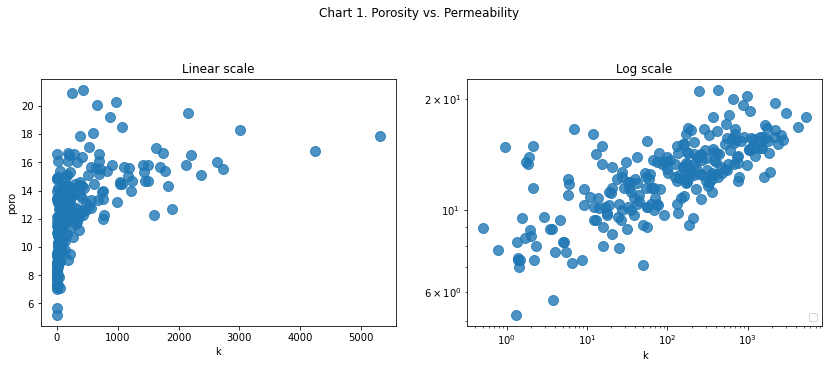

In [7]:
fig = plt.figure(figsize=(14, 10)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 1 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

a=ax0.scatter(df['k'], df['poro'], s=100, alpha=0.8)
ax0.set_xlabel("k")
ax0.set_ylabel("poro")
ax0.set_title("Linear scale")

b=ax1.scatter(df['k'], df['poro'], s=100, alpha=0.8)
ax1.set_xlabel("k")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_title("Log scale")

plt.legend(loc='lower right');

fig.suptitle('Chart 1. Porosity vs. Permeability')

As we can see in the chart above is the relationship between porosity and permeability is most clearly on a logarithmic scale.

The next step is to **transform** the data into logarithmic values for better analysis and create a new dataset using only porosity and permeability values.

In [8]:
df["logk"]=np.log(df.k)
df["logporo"]=np.log(df.poro)
df.head()

,id,core_sample,true_rt,poro,k,logk,logporo
0,1,rock-132-27,0,16.606437,696.971278,6.546744,2.809790
1,2,rock-132-67,0,17.877034,5311.468120,8.577624,2.883517
2,3,rock-132-80,0,15.805681,2120.361599,7.659342,2.760369
3,4,rock-133-151,0,15.000000,1160.000000,7.056175,2.708050
4,5,rock-133-4,0,15.500000,707.000000,6.561031,2.740840


Finally, we get the dataset that allows us to perform the clustering analysis and next compare this results with the regular approach of petrophysics analysis.

## Clustering analysis

In this section, we perform a clustering analysis assuming that we don't have a rock type petrophysical classification. In general, the regular petrophysical classification approach takes considerable time in the reservoir characterization process and by using machine learning algorithms we can reduce the time significantly.

To perform the clustering analysis we used the K-means algorithm considering data preprocessing as follow:
- Un-preprocessed data.
- Processed data through standard deviation scaler
- Processed data through min-max scaler

To select the optimal number of groups we calculate the inertia, which is nothing more than the sum of the squared distances of each object in the group to its centroid. Once the inertia values were obtained after applying the K-means from 1 to N clusters, we plot the inertia versus the number of clusters in a linear plot. This chart shows a sudden change in the evolution of inertia, with the line represented having a shape similar to that of an arm and its elbow. The point at which this sudden change in inertia is observed will tell us the optimal number of groups to select for that data set; Or put another way, the point that would represent the elbow of the arm will be the optimal number of groups for that data set.


$Inertia = \sum_{i=0}^{N} [[x_{i} -\mu]]^2$


### K-means clustering: un-preprocessed data

In [9]:
# Setting the k-meand algortithm
kmup=KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=0)

In [10]:
# Fit the data to the clustering algorithm
kmup.fit(df.get(['logk','logporo']))

KMeans(n_clusters=4, n_init=12, random_state=0)

In [11]:
# Save results of the labels and centroids of clustering calculations
kmup_labels = kmup.labels_
kmup_centroid = kmup.cluster_centers_

To evaluate the clustering analysis we performed an inertia calculation to set the optimal clusters numbers

In [12]:
inertia_kmup = []
for i in np.arange(1, 11):
    kmupi = KMeans(n_clusters=i)
    kmupi.fit(df.get(['logk','logporo']))
    inertia_kmup.append(kmupi.inertia_)

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### K-means clustering: StandardScaler data transformation

In [13]:
# Performing data transformation by standardization and saving results
standard_scaler = StandardScaler()
df_ss = standard_scaler.fit_transform(df.get(['logk','logporo']))

In [14]:
kmss = KMeans(n_clusters=4,n_init = 12, random_state=0).fit(df_ss)
kmss_centroid = kmss.cluster_centers_
kmss_labels = kmss.labels_

In [15]:
inertia_kmss = []
for i in np.arange(1, 11):
    kmssi = KMeans(n_clusters=i)
    kmssi.fit(df_ss)
    inertia_kmss.append(kmssi.inertia_)

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### K-means clustering: MinMaxScaler data transformation

In [16]:
# Performing min-max data transformation and saving results
minmax_scaler = MinMaxScaler()
df_mm = minmax_scaler.fit_transform(df.get(['logk','logporo']))

In [17]:
kmm = KMeans(n_clusters=4,n_init = 12, random_state=0).fit(df_mm)
kmm_centroid = kmm.cluster_centers_
kmm_labels = kmm.labels_

In [18]:
inertia_kmm = []
for i in np.arange(1, 11):
    kmmi = KMeans(n_clusters=i)
    kmmi.fit(df_mm)
    inertia_kmm.append(kmmi.inertia_)

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Analysis and results

### Inertia - Elbow Plot

Text(0.5, 0.98, 'Chart 2. Elbow Chart Comparison')

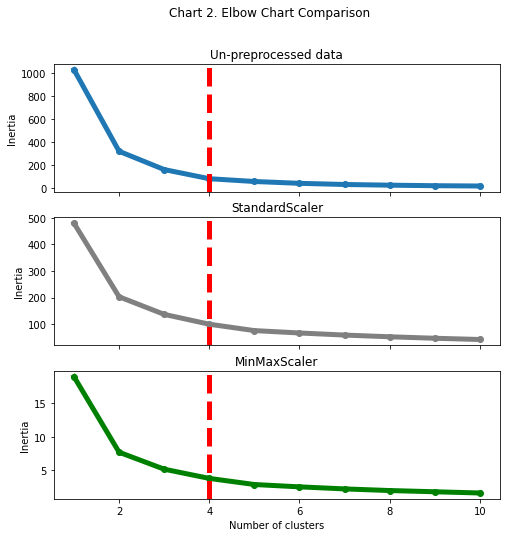

In [19]:
## Comparing k-means clustering before rearranging dataset

fig, axs= plt.subplots(3,1, figsize=(8, 8), sharex=True)

c=axs[0].plot(np.arange(1, 11), inertia_kmup, marker='o', lw=5)
cc=axs[0].axvline(4, color='r', linestyle='dashed', linewidth=5)
axs[0].set_title("Un-preprocessed data")
axs[0].set_ylabel("Inertia")

d=axs[1].plot(np.arange(1, 11), inertia_kmss, marker='o', lw=5, color='gray')
dd=axs[1].axvline(4, color='r', linestyle='dashed', linewidth=5)
axs[1].set_title("StandardScaler")
axs[1].set_ylabel("Inertia")

e=axs[2].plot(np.arange(1, 11), inertia_kmm, marker='o', lw=5, color='green')
ee=axs[2].axvline(4, color='r', linestyle='dashed', linewidth=5)
axs[2].set_title("MinMaxScaler")
axs[2].set_xlabel("Number of clusters")
axs[2].set_ylabel("Inertia")

fig.suptitle('Chart 2. Elbow Chart Comparison')

### Clustering labeling

In [20]:
df.insert(3,"RT",kmup_labels,True)
df.insert(4,"RT1",kmss_labels,True)
df.insert(5,"RT2",kmm_labels,True)
df.head(5)

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
0,1,rock-132-27,0,1,3,2,16.606437,696.971278,6.546744,2.809790
1,2,rock-132-67,0,1,3,2,17.877034,5311.468120,8.577624,2.883517
2,3,rock-132-80,0,1,3,2,15.805681,2120.361599,7.659342,2.760369
3,4,rock-133-151,0,1,3,2,15.000000,1160.000000,7.056175,2.708050
4,5,rock-133-4,0,1,3,2,15.500000,707.000000,6.561031,2.740840


Text(0.5, 0.98, 'Chart 3. Rock Type Classification Comparison')

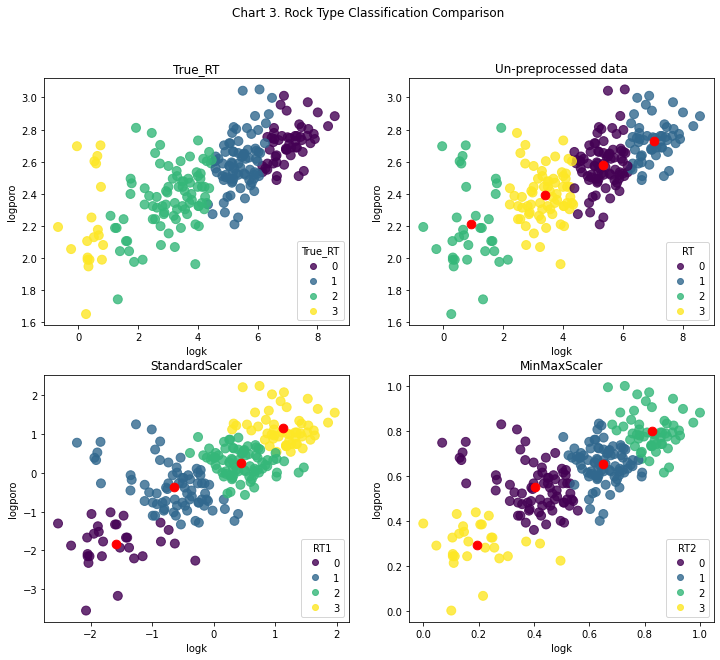

In [21]:
## Comparing k-means clustering before rearranging dataset

## fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2,figsize=(12, 10))

classes = ['0', '1', '2','3']
h=axs[0, 0].scatter(df['logk'], df['logporo'], s=80, c=df['true_rt'], alpha=0.8)
axs[0, 0].set_title("True_RT")
axs[0, 0].legend(handles=h.legend_elements()[0], labels=classes, title="True_RT")
axs[0, 0].set_xlabel("logk")
axs[0, 0].set_ylabel("logporo")

classes_rt = ['0', '1', '2','3']
j=axs[0, 1].scatter(df['logk'], df['logporo'], s=80, c=df['RT'], alpha=0.8)
jj=axs[0, 1].scatter(kmup_centroid[:, 0], kmup_centroid[:, 1], c='red', s=75)
axs[0, 1].set_title("Un-preprocessed data")
axs[0, 1].legend(handles=j.legend_elements()[0], labels=classes_rt, title="RT")
axs[0, 1].set_xlabel("logk")
axs[0, 1].set_ylabel("logporo")

classes_rt1 = ['0', '1', '2','3']
k=axs[1, 0].scatter(df_ss[:, 0], df_ss[:, 1], s=80, c=df['RT1'], alpha=0.8)
kk=axs[1, 0].scatter(kmss_centroid[:, 0], kmss_centroid[:, 1], c='red', s=75)
axs[1, 0].set_title("StandardScaler")
axs[1, 0].legend(handles=k.legend_elements()[0], labels=classes_rt1, title="RT1")
axs[1, 0].set_xlabel("logk")
axs[1, 0].set_ylabel("logporo")

classes_rt2 = ['0', '1', '2','3']
l=axs[1, 1].scatter(df_mm[:, 0], df_mm[:, 1], s=80, c=df['RT2'], alpha=0.8)
ll=axs[1, 1].scatter(kmm_centroid[:, 0], kmm_centroid[:, 1], c='red', s=75)
axs[1, 1].set_title("MinMaxScaler")
axs[1, 1].legend(handles=l.legend_elements()[0], labels=classes_rt2, title="RT2")
axs[1, 1].set_xlabel("logk")
axs[1, 1].set_ylabel("logporo")

fig.suptitle('Chart 3. Rock Type Classification Comparison')

As we can see in chart 2, the optimal number of clusters could be 4. Analyzing chart 4 we can observe that the result of the rock types clustering considering pre-processed and processed data is very similar to the petrophysical classification; therefore we can say that the clustering method using the k-means algorithm is recommended when a petrophysical model is not available.

To measure which of the clusters used was the most similar to the petrophysical data, a grouping of the data by rock type of the petrophysical model was carried out and in this way, the average value of the rock type of each conglomerate was compared with the petrophysical model.

In [22]:
#Copy dataset
df_new=df
df_new.head()

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
0,1,rock-132-27,0,1,3,2,16.606437,696.971278,6.546744,2.809790
1,2,rock-132-67,0,1,3,2,17.877034,5311.468120,8.577624,2.883517
2,3,rock-132-80,0,1,3,2,15.805681,2120.361599,7.659342,2.760369
3,4,rock-133-151,0,1,3,2,15.000000,1160.000000,7.056175,2.708050
4,5,rock-133-4,0,1,3,2,15.500000,707.000000,6.561031,2.740840


In [23]:
# Group RT by mean before rearranging dataset
print(df_new.groupby(['true_rt']).mean())

                 id        RT       RT1       RT2       poro            k  \
true_rt                                                                     
0         54.169811  0.962264  2.754717  1.849057  15.199041  1367.889489   
1        114.740741  0.086420  2.086420  1.098765  13.549095   247.110768   
2        187.732558  2.686047  0.895349  0.569767  10.877532    31.855354   
3         30.500000  2.000000  0.300000  2.100000   9.580384     1.594171   

             logk   logporo  
true_rt                      
0        7.050349  2.713988  
1        5.392230  2.592581  
2        3.124194  2.368165  
3        0.409527  2.217410  


Due to the fact that during the execution of the clustering algorithm the labels of the data set are not ordered the same, they must be reordered in order to correctly compare the average value of the rock type.

In [24]:
df_new1=df_new.replace({'RT': {1: 4, 0: 5, 3: 6, 2: 7}})

In [25]:
df_new1=df_new1.replace({'RT1': {3: 4, 2: 5, 1: 6, 0: 7}})

In [26]:
df_new1=df_new1.replace({'RT2': {2: 4, 1: 5, 0: 6, 3: 7}})

In [27]:
df_new1.tail()

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
235,236,rock-70-104,2,6,6,6,12.7,26.90,3.292126,2.541602
236,237,rock-70-114,2,6,6,6,10.8,13.80,2.624669,2.379546
237,238,rock-70-321,2,6,6,6,16.1,11.70,2.459589,2.778819
238,239,rock-70-415,2,7,7,7,9.6,2.95,1.081805,2.261763
239,240,rock-70-452,2,6,6,6,11.4,9.24,2.223542,2.433613


In [28]:
df_new1=df_new1.replace({'RT': {4: 0, 5: 1, 6: 2, 7: 3}})

In [29]:
df_new1=df_new1.replace({'RT1': {4: 0, 5: 1, 6: 2, 7: 3}})

In [30]:
df_new1=df_new1.replace({'RT2': {4: 0, 5: 1, 6: 2, 7: 3}})

In [31]:
# Group RT by mean after rearranging DB
print(df_new1.groupby(['true_rt']).mean().round(2))

             id    RT   RT1   RT2   poro        k  logk  logporo
true_rt                                                         
0         54.17  0.04  0.25  0.15  15.20  1367.89  7.05     2.71
1        114.74  0.96  0.91  0.90  13.55   247.11  5.39     2.59
2        187.73  2.13  2.10  2.08  10.88    31.86  3.12     2.37
3         30.50  3.00  2.70  2.70   9.58     1.59  0.41     2.22


In the above table, we can read at first column the value of the petrophysical rock type, and columns RT, RT1, and RT2 the rock type average value of the clusters shown on chart 3. In general, the 3 clusters have an average rock type close to that of the petrophysical model.

Text(0.5, 0.98, 'Chart 4. Rock Type Classification Comparison')

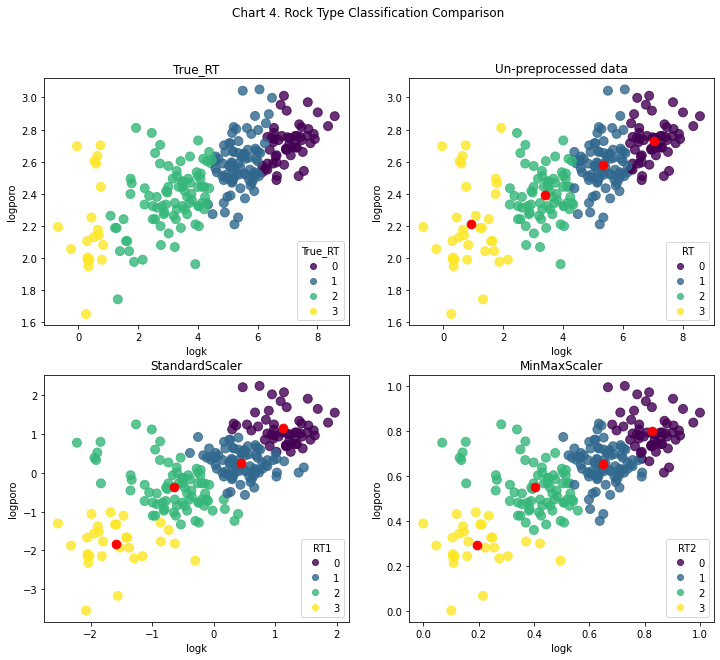

In [32]:
## Comparing k-means clustering after rearranging dataset

## fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2,figsize=(12, 10))

classes = ['0', '1', '2','3']
h=axs[0, 0].scatter(df_new1['logk'], df_new1['logporo'], s=80, c=df_new1['true_rt'], alpha=0.8)
axs[0, 0].set_title("True_RT")
axs[0, 0].legend(handles=h.legend_elements()[0], labels=classes, title="True_RT")
axs[0, 0].set_xlabel("logk")
axs[0, 0].set_ylabel("logporo")

classes_rt = ['0', '1', '2','3']
j=axs[0, 1].scatter(df['logk'], df['logporo'], s=80, c=df_new1['RT'], alpha=0.8)
jj=axs[0, 1].scatter(kmup_centroid[:, 0], kmup_centroid[:, 1], c='red', s=75)
axs[0, 1].set_title("Un-preprocessed data")
axs[0, 1].legend(handles=j.legend_elements()[0], labels=classes_rt, title="RT")
axs[0, 1].set_xlabel("logk")
axs[0, 1].set_ylabel("logporo")

classes_rt1 = ['0', '1', '2','3']
k=axs[1, 0].scatter(df_ss[:, 0], df_ss[:, 1], s=80, c=df_new1['RT1'], alpha=0.8)
kk=axs[1, 0].scatter(kmss_centroid[:, 0], kmss_centroid[:, 1], c='red', s=75)
axs[1, 0].set_title("StandardScaler")
axs[1, 0].legend(handles=k.legend_elements()[0], labels=classes_rt1, title="RT1")
axs[1, 0].set_xlabel("logk")
axs[1, 0].set_ylabel("logporo")

classes_rt2 = ['0', '1', '2','3']
l=axs[1, 1].scatter(df_mm[:, 0], df_mm[:, 1], s=80, c=df_new1['RT2'], alpha=0.8)
ll=axs[1, 1].scatter(kmm_centroid[:, 0], kmm_centroid[:, 1], c='red', s=75)
axs[1, 1].set_title("MinMaxScaler")
axs[1, 1].legend(handles=l.legend_elements()[0], labels=classes_rt2, title="RT2")
axs[1, 1].set_xlabel("logk")
axs[1, 1].set_ylabel("logporo")

fig.suptitle('Chart 4. Rock Type Classification Comparison')

As we can see in chart 4 the labels of the 4 subplots are in the same order.

### Summary

1. The rock type (RT) identified by k-means cluster is close to the true rock type (True_RT), which means that the k-means clustering analysis works for quick characterization of rock quality from core analysis samples.

2. The elbow plot shows that the optimal cluster number is 4.

3. Preprocessing data doesn't have a relevant impact on the final results. In this case, it's not a rule.

| TrueRT 	| RT 	| RT1 	| RT2 	|
|:---:	|:---:	|:---:	|:---:	|
| 0 	|  0.04 	|  0.25 	|  0.15 	|	
| 1 	|  0.96 	|  0.91 	|  0.90 	|
| 2 	|  2.13 	|  2.10	    |  2.08 	|
| 3    	|  3.00  	|  2.70  	|  2.70  	|

---

Author:
José Gregorio Pérez

E-mail: perezjgg@gmail.com

Note: If you need to use this analysis for academic purposes, please quote the author.
